In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
## Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
attributeNames = ['times-pregnant', 'plasma-glucose-concentration', 'diastolic-blood-pressure', 'skin-fold-thickness','serum-insulin', 'bmi', 'ped-function', 'age', 'class']
df = pd.read_csv(url, names=attributeNames)
print(df.shape)
print(df.describe())
print(df.groupby('class').size())

(768, 9)
       times-pregnant  plasma-glucose-concentration  diastolic-blood-pressure  \
count      768.000000                    768.000000                768.000000   
mean         3.845052                    120.894531                 69.105469   
std          3.369578                     31.972618                 19.355807   
min          0.000000                      0.000000                  0.000000   
25%          1.000000                     99.000000                 62.000000   
50%          3.000000                    117.000000                 72.000000   
75%          6.000000                    140.250000                 80.000000   
max         17.000000                    199.000000                122.000000   

       skin-fold-thickness  serum-insulin         bmi  ped-function  \
count           768.000000     768.000000  768.000000    768.000000   
mean             20.536458      79.799479   31.992578      0.471876   
std              15.952218     115.244002    7.8

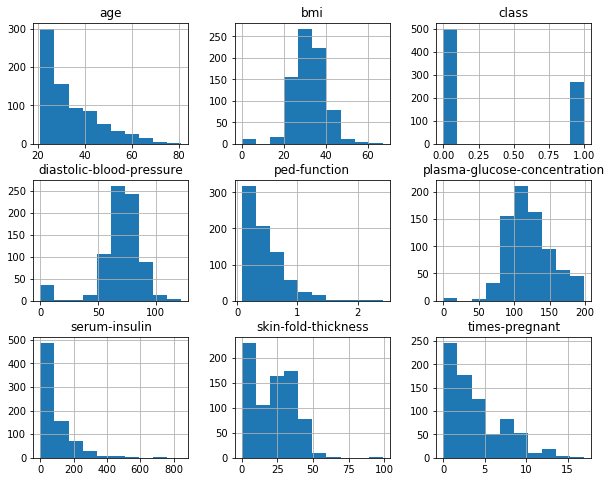

In [3]:
# Histogram
df.hist(figsize=(10,8))
plt.show()

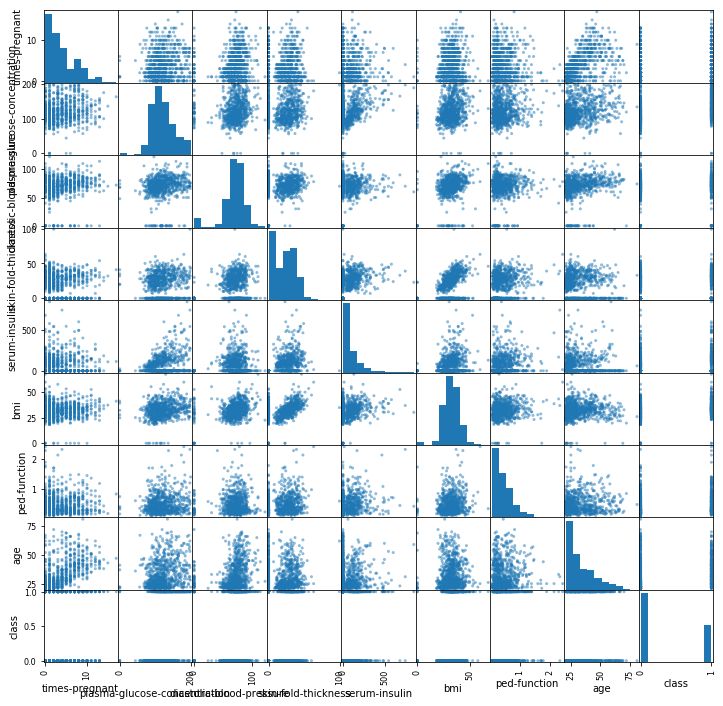

In [4]:
# Scatterplots 
scatter_matrix(df, figsize=(12,12))
plt.show()

In [5]:
# Normalize Data
x = df.values #returns a numpy array
print(x[0:2,])
xnorm = preprocessing.normalize(x,axis=0,norm='l2')

# remove class label from data
X = xnorm[:,0:8]
print(X[:2])
y = x[:,8]
print(y[:5])

[[   6.     148.      72.      35.       0.      33.6      0.627   50.
     1.   ]
 [   1.      85.      66.      29.       0.      26.6      0.351   31.
     0.   ]]
[[ 0.04235974  0.04270834  0.03620428  0.04857917  0.          0.03679789
   0.03924821  0.05117289]
 [ 0.00705996  0.02452844  0.03318725  0.04025131  0.          0.02913166
   0.02197149  0.03172719]]
[ 1.  0.  1.  0.  1.]


In [6]:
# set of labeled data (X_validate, Y_validate)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [10]:
## GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB() 
cv_results = model_selection.cross_val_score(nb, X_train, y_train, cv=10, scoring='accuracy')
cv_results
msg = "CV_Mean: %f CV_Std: %f " % (cv_results.mean(), cv_results.std())
print(msg)
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print("Naive Bayes:")
print("Accuracy Score on validation dataset:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n",classification_report(y_test, predictions))

CV_Mean: 0.742741 CV_Std: 0.054798 
Naive Bayes:
Accuracy Score on validation dataset: 0.792207792208

Confusion Matrix:
 [[93 14]
 [18 29]]

Classification Report:
              precision    recall  f1-score   support

        0.0       0.84      0.87      0.85       107
        1.0       0.67      0.62      0.64        47

avg / total       0.79      0.79      0.79       154



In [12]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv_results = model_selection.cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
cv_results
msg = "CV_Mean: %f CV_Std: %f " % (cv_results.mean(), cv_results.std())
print(msg)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print("Decision Tree:")
print("Accuracy Score on validation dataset:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n",classification_report(y_test, predictions))

CV_Mean: 0.697079 CV_Std: 0.056215 
Decision Tree:
Accuracy Score on validation dataset: 0.792207792208

Confusion Matrix:
 [[87 20]
 [12 35]]

Classification Report:
              precision    recall  f1-score   support

        0.0       0.88      0.81      0.84       107
        1.0       0.64      0.74      0.69        47

avg / total       0.80      0.79      0.80       154



In [15]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
cv_results = model_selection.cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
cv_results
msg = "CV_Mean: %f CV_Std: %f " % (cv_results.mean(), cv_results.std())
print(msg)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("Random Forest:")
print("Accuracy Score on validation dataset:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n",classification_report(y_test, predictions))

CV_Mean: 0.739382 CV_Std: 0.051212 
Random Forest:
Accuracy Score on validation dataset: 0.772727272727

Confusion Matrix:
 [[93 14]
 [21 26]]

Classification Report:
              precision    recall  f1-score   support

        0.0       0.82      0.87      0.84       107
        1.0       0.65      0.55      0.60        47

avg / total       0.77      0.77      0.77       154



In [17]:
## SVM
from sklearn.svm import SVC
svm = SVC()
cv_results = model_selection.cross_val_score(svm, X_train, y_train, cv=10, scoring='accuracy')
cv_results
msg = "CV_Mean: %f CV_Std: %f " % (cv_results.mean(), cv_results.std())
print(msg)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print("SVM:")
print("Accuracy Score on validation dataset:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n",classification_report(y_test, predictions))

CV_Mean: 0.640065 CV_Std: 0.002864 
SVM:
Accuracy Score on validation dataset: 0.694805194805

Confusion Matrix:
 [[107   0]
 [ 47   0]]

Classification Report:
              precision    recall  f1-score   support

        0.0       0.69      1.00      0.82       107
        1.0       0.00      0.00      0.00        47

avg / total       0.48      0.69      0.57       154



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
